---
<font color='Blue' size="4">
F37.101 컴퓨팅 기초: 처음 만나는 컴퓨팅(First Adventures in Computing)</font>

---



# Chapter 14. 종합 예제


:::{admonition} 학습목표와 기대효과
:class: info  
- 학습목표
  - CCTV와 인구수 데이터를 다뤄보고 분석하고 시각화해보자.

- 기대효과
  - 분석/처리한 데이터를 시각적으로 나타내어 효과적으로 설명할 수 있다.

:::

## 준비작업

In [1]:
#1. 현재 셀 실행
#2. 런타임 -> 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo' is not recognized as an internal or external command,
operable program or batch file.


'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

D:\users\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
plt.rc('font', family='NanumBarunGothic')

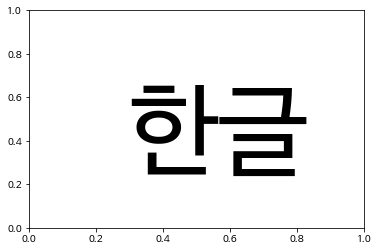

In [4]:
plt.text(0.3, 0.3, '한글', size=100)
plt.show()

## 인구데이터 읽기

- 인구데이터를 read_csv()로 읽어온다.
- 옵션 sep는 데이터가 탭으로 분리되어 있으니 탭기준으로 칼럼을 읽어라는 의미이다.
- 옵션 header는 칼럼명(칼럼 인덱스)를 지정하는 옵션으로 아래 코드에서는 2행을 칼럼명로 사용하겠다는 의미이다.
- 옵션 usecols는 사용할 칼럼 번호를 지정하는 옵션으로 리스트안에 적힌 칼럼번호에 해당하는 칼럼만 사용하겠다는 의미이다.
- 옵션 thousands는 숫자 데이터에 세자리마다 들어가 있는 컴마를 제거하고 읽으라는 의미이다. 컴마를 제거하지 않고 읽으면 문자열로 처리된다.

In [5]:
import pandas as pd

url = 'https://raw.githubusercontent.com/HaesunByun/common/main/data/population_in_Seoul.txt'
pop_Seoul = pd.read_csv(url, sep = '\t',header = 2, usecols = [1, 3, 6, 9, 13],thousands =',')

pop_Seoul

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989
6,동대문구,362793,346156,16637,60367
7,중랑구,400678,395619,5059,66764
8,성북구,454532,442494,12038,72172
9,강북구,316750,312985,3765,61660


- 데이터프레임을 확인해보고 어떤 작업이 필요한지 생각해보자.


- 칼럼명을 변경해줘야 할 필요가 있다. 아래와 같이 칼럼명을 변경해주자.
```
'지역구', '인구수', '한국인', '외국인', '고령자'
```

- .set_index()함수로 '지역구' 열을 인덱스로 지정해보자. 또한 inplace 옵션을 True로 줘서 원본 데이터프레임에 바로 업데이트해보자.

- 자치구 인구수 대비 CCTV수를 분석하기 위한 작업이므로 index 0에 있는 '합계' 행은 필요하지 않은 데이터인것 같다. 삭제하자. 또한 inplace 옵션을 True로 줘서 원본 데이터프레임에 바로 업데이트해보자.

## CCTV 데이터 읽기

In [6]:
url = 'https://raw.githubusercontent.com/HaesunByun/common/main/data/CCTV_in_Seoul.csv'
CCTV_Seoul = pd.read_csv(url)
CCTV_Seoul

,Unnamed: 0,기관명,소계,2017년도이전,2018년,2019년,2020년
0,0,강남구,2780,1292,430,584,932
1,1,강동구,773,379,99,155,377
2,2,강북구,748,369,120,138,204
3,3,강서구,884,388,258,184,81
4,4,관악구,1496,846,260,390,613
5,5,광진구,707,573,78,53,174
6,6,구로구,1561,1142,173,246,323
7,7,금천구,1015,674,51,269,354
8,8,노원구,1265,542,57,451,516
9,9,도봉구,485,238,159,42,386


- 데이터프레임을 확인해보고 어떤 작업이 필요한지 생각해보자.


- '기관명'을 인덱스로 지정해보자. 또한 inplace 옵션을 True로 줘서 원본 데이터프레임에 바로 업데이트해보자.

## 데이터 합치기

- CCTV_Seoul의 '소계'열 데이터를 pop_Seoul의 'CCTV수' 열에 저장하여 데이터를 합쳐보자.

## 합친 데이터 저장하고 불러오기

- to_csv('파일명')로 합친 데이터를 저장하자. 파일명은 'CCTVnPop_in_Seoul.csv'로 한다.
- 이렇게 전처리 작업을 거친 데이터프레임을 다음 사용을 위해 저장해 놓은 후 다운로드 받아 놓으면 추후에 동일 작업을 하지 않아도 된다.

- 저장한 파일을 read_csv()로 불러와보자. 불러온 후, set_index()로 인덱스를 지정할 수 있지만, 파일을 불러올 때 index_col 옵션으로 인덱스를 지정할 수도 있다.
```
df = pd.read_csv('CCTVnPop_in_Seoul.csv', index_col = 0)
df
```

## 데이터 분석

- numpy의 corrcoef()함수를 통해 '인구수'와 'CCTV수'와의 상관계수를 확인해보자.
- corrcoef() 괄호안에 상관계수를 확인하고자 하는 칼럼의 이름을 명시한다.
```
import numpy as np
print (np.corrcoef(df['인구수'], df['CCTV수']))
```

- corr()함수는 모든 칼럼 간의 상관 계수를 매트릭스 형태로 반환하는 함수이다.
```
df.corr()
```

## 데이터 시각화

### CCTV수의 시각화
- 자치구별 'CCTV수'를 수평막대 그래프로 그려보자.

- color_palette()함수로 사용할 팔레트와 색 갯수를 지정한다.
- 팔레트 이름은 다음 링크를 통해 확인 할 수 있다. https://seaborn.pydata.org/tutorial/color_palettes.html
```
import matplotlib.pyplot as plt
import seaborn as sns
colors=sns.color_palette(palette='hls', n_colors=len(df.index))
df['CCTV수'].plot(kind='barh', grid = True, color=colors)
plt.show()
```

- 정렬한 가로막대 그래프로 그려보자. 정렬은 sort_values()로 할 수 있다.
```
df['CCTV수'].sort_values().plot(kind='barh', grid = True, color=colors)
plt.show()
```

### 인구수와 CCTV수의 시각화
- '인구수'와 'CCTV수'로 산포도 그래프를 그려보자.
```
plt.figure(figsize=(10,8))
plt.scatter(df['인구수'], df['CCTV수'], s = 50)
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.grid()
plt.show()
```

### 인구수 대비 CCTV 기준선 긋기
- 인구수 대비 적정 CCTV 수 의 기준선을 그어보자.
- numpy의 polyfit(a, b, n)함수는 두 데이터 a, b를 대표하는 n차 방정식의 계수를 구하는 함수이다.
- '인구수'와 'CCTV수'를 대표하는 1차 방정식의 계수를 구해보자.
```
fp = np.polyfit(df['인구수'], df['CCTV수'], 1)
print(fp)
```

- 앞에서 구한 계수를 numpy의 poly1d()함수의 전달인자로 넣어주면 1차 다항식 함수를 구할 수 있다.
- poly1d()는 1차 다항식을 만들어 주는 함수이다.
```
f = np.poly1d(fp)
print(f)
```

- df['인구수']와 df['CCTV수']를 대표하는 다항식 함수 f를 구했으므로 그 f에 인구수를 넣어보자.
- f에 넣을 인구수를 일정한 간격으로 만들기 위해 numpy의 linspace()함수로 일정한 간격으로 등분한 배열을 만든다.
- linspace()함수로 100000부터 700000까지 100개로 등분한 배열을 만들어 x축 데이터로 사용하자.
- 여기서 100000~700000를 범위로 준 이유는 인구수가 가장 낮은 지역구가 136469, 가장 높은 지역구가 680883이기 때문이다.
```
fx = np.linspace(100000, 700000, 100)
print(fx)
```

- 등분배열 fx를 x의 값으로 주고, 위에서 만든 함수 f에 fx를 넣어 y의 값을 계산한다. x와 y가 만나는 좌표에 점을 찍은 후, 선으로 이어 선그래프를 그려보자.
- 옵션 ls는 line style, lw는 line width이다.
```
plt.plot(fx, f(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.show()
```

- 인구수 대비 CCTV수의 기준선(대표직선) 그래프와 산포도 그래프를 같이 나타내보자.
```
plt.figure(figsize=(10,8))
plt.scatter(df['인구수'], df['CCTV수'], s = 50)
plt.plot(fx, f(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.grid()
plt.show()
```

- 실제 CCTV수와 실 인구수 대비 기준이 되는 CCTV수의 오차를 계산해보자.
- 실 인구수 대비 CCTV수는 다음과 같이 구할 수 있다. 앞에서 구한 1차 다항식 f함수에 실 '인구수'를 넣으면 실 인구수 대비 적정 CCTV수가 나온다.
```
f(df['인구수'])
```
- 실 'CCTV수'에서 실 인구수 대비 적정 CCTV수를 빼면 그 오차를 구할 수 있다.
- 실 'CCTV수'가 적정 CCTV수보다 많을 수도, 혹은 적을 수도 있으므로 오차를 계산하기 위해 절대값을 취한다.
```
df['오차'] = np.abs(df['CCTV수'] - f(df['인구수']))
df.head(5)
```

- 오차가 큰 상위 10개구를 확인해보기 위해 내림차순으로 정렬해보자.
```
df.sort_values(by='오차', ascending=False, inplace = True)
df.head(5)
```

### 상위 10개구 구이름 표시하기
- 오차가 큰 상위 10개구에 해당하는 산포도 점 위치에 구이름을 표시해보자.
```
plt.figure(figsize=(10,8))
plt.scatter(df['인구수'], df['CCTV수'], s = 50)
plt.plot(fx, f(fx), ls='dashed', lw=3, color='g')
for n in range(10):
  plt.text(df['인구수'][n], df['CCTV수'][n]-100, df.index[n], fontsize = 10)
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.grid()
plt.show()
```

### colorbar 추가
- 오차데이터를 색과 연결하여 colorbar()를 생성해보자.
- scatter 그래프에서 c = df['오차']와 같이 컬러(c) 옵션을 오차 데이터와 연동시켜준다.
```
plt.scatter(df['인구수'], df['CCTV수'], s = 50, c = df['오차'])
```
그런 후에 colorbar()를 보이게 한다.
```
plt.colorbar()
```
plt.colorbar()까지 추가한 코드는 다음과 같다.
```
plt.figure(figsize=(10,8))
plt.scatter(df['인구수'], df['CCTV수'], s = 50, c = df['오차'])
plt.plot(fx, f(fx), ls='dashed', lw=3, color='g')
for n in range(10):
  plt.text(df['인구수'][n], df['CCTV수'][n]-100, df.index[n], fontsize = 10)
plt.colorbar()
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.grid()
plt.show()
```

## 마무리
- 인구수 데이터와 CCTV 데이터를 각각 불러왔다.
- 이들 데이터에서 불필요한 데이터는 제거하고 필요한 데이터로만 합치는 작업을 해서 하나의 데이터프레임으로 만들었다.
- 인구수 대비 CCTV수의 상관관계를 파악해보았다.
- 자치구별 CCTV수를 막대그래프로 나타내보았다.
- 인구수 대비 CCTV수의 대표직선을 그려보았다.
- 실인구수 대비 CCTV 수와 기준 인구수 대비 CCTV 수의 오차를 구해 보았다.
- 산포도그래프와 colorbar()를 이용하여 오차를 표현해보았다.
- 결론적으로 지역구별 인구수 대비 적정 CCTV수와 실 CCTV 수의 오차를 파악해보고 오차가 순 10개구를 표시해보는 예제를 다뤄보았다.

---
<font color='Grey' size="4">
F37.101 컴퓨팅 기초: 처음 만나는 컴퓨팅(First Adventures in Computing)</font> 서울대학교 학부대학 변해선

---
